In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
monthlyUnemployment=pd.read_csv('unemploymentOECD_monthly.csv')
monthlyUnemployment
usefulMonthlyUnemployment=monthlyUnemployment[['LOCATION','TIME','Value']]

In [3]:
url ='https://raw.githubusercontent.com/tm19784/tm19784.github.io/main/jsonFolder/rawPriceETH.json'
html = requests.get(url)

In [4]:
Ethereum_price_json = html.json()
ETH=pd.DataFrame(Ethereum_price_json)
ETH_useful=ETH[['time_close','price_close']]
ETH_useful

,time_close,price_close
0,2016-10-20T20:18:26.6010000Z,10.18478
1,2016-10-30T23:46:16.0410000Z,9.68622
2,2016-11-09T21:38:05.5430000Z,9.05000
3,2016-11-19T20:45:29.0350000Z,7.98496
4,2016-11-29T22:08:00.0360000Z,6.89169
...,...,...
184,2021-11-13T23:59:52.6350460Z,3470.13000
185,2021-11-23T23:59:55.6560050Z,3246.49000
186,2021-12-03T23:59:58.9420140Z,3193.87000
187,2021-12-13T23:59:58.8397000Z,2866.93000


In [5]:
ETH_useful['time_close'] = pd.to_datetime(ETH_useful['time_close'])
ETH_useful
ETH_monthly = ETH_useful.set_index('time_close').resample('1M').mean().reset_index()[-65:].reset_index()
ETH_monthly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,time_close,price_close
0,0,2016-10-31 00:00:00+00:00,9.935500
1,1,2016-11-30 00:00:00+00:00,7.975550
2,2,2016-12-31 00:00:00+00:00,6.709893
3,3,2017-01-31 00:00:00+00:00,8.442843
4,4,2017-02-28 00:00:00+00:00,10.676927
...,...,...,...
58,58,2021-08-31 00:00:00+00:00,2253.796667
59,59,2021-09-30 00:00:00+00:00,2480.560000
60,60,2021-10-31 00:00:00+00:00,2729.053333
61,61,2021-11-30 00:00:00+00:00,3360.006667


In [6]:
usefulMonthlyUnemployment['TIME'] = pd.to_datetime(usefulMonthlyUnemployment['TIME'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
Germany_usefulMonthlyUnemployment = usefulMonthlyUnemployment[usefulMonthlyUnemployment['LOCATION'].str.contains('DEU')]
Germany_usefulMonthlyUnemployment.reset_index()

,index,LOCATION,TIME,Value
0,593,DEU,2015-09-01,4.5
1,594,DEU,2015-10-01,4.5
2,595,DEU,2015-11-01,4.5
3,596,DEU,2015-12-01,4.5
4,597,DEU,2016-01-01,4.4
...,...,...,...,...
69,662,DEU,2021-06-01,3.5
70,663,DEU,2021-07-01,3.4
71,664,DEU,2021-08-01,3.4
72,665,DEU,2021-09-01,3.3


In [8]:
Ger_ETH = Germany_usefulMonthlyUnemployment[-62:].reset_index()[['LOCATION', 'TIME', 'Value']].join(ETH_monthly)
Ger_ETH

,LOCATION,TIME,Value,index,time_close,price_close
0,DEU,2016-09-01,4.1,0,2016-10-31 00:00:00+00:00,9.935500
1,DEU,2016-10-01,4.0,1,2016-11-30 00:00:00+00:00,7.975550
2,DEU,2016-11-01,3.9,2,2016-12-31 00:00:00+00:00,6.709893
3,DEU,2016-12-01,3.9,3,2017-01-31 00:00:00+00:00,8.442843
4,DEU,2017-01-01,3.9,4,2017-02-28 00:00:00+00:00,10.676927
...,...,...,...,...,...,...
57,DEU,2021-06-01,3.5,57,2021-07-31 00:00:00+00:00,1519.460000
58,DEU,2021-07-01,3.4,58,2021-08-31 00:00:00+00:00,2253.796667
59,DEU,2021-08-01,3.4,59,2021-09-30 00:00:00+00:00,2480.560000
60,DEU,2021-09-01,3.3,60,2021-10-31 00:00:00+00:00,2729.053333


In [9]:
Ger_ETH.rename(columns={'Value': 'Germany_unemployment_rate'}, inplace=True)
Ger_ETH.rename(columns={'price_close': 'ETH_closing_price'}, inplace=True)

In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()

In [11]:
Ger_ETH_correlation = Ger_ETH[['Germany_unemployment_rate','ETH_closing_price']]
Ger_ETH.to_csv('Ger_ETH.csv')
Ger_Ethereum_correlation = pd.read_csv('Ger_ETH.csv')

[Text(0.5, 1.0, 'Regression of closing price of Ethereum on unemployment rate of Germany')]

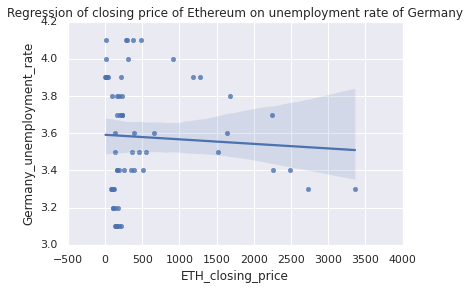

In [12]:
sns.regplot(x='ETH_closing_price',y='Germany_unemployment_rate',data=Ger_Ethereum_correlation).set(title='Regression of closing price of Ethereum on unemployment rate of Germany')

In [13]:
from scipy.stats import linregress

In [15]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=Ger_Ethereum_correlation.dropna()['ETH_closing_price'], y=Ger_Ethereum_correlation.dropna()['Germany_unemployment_rate'])

In [16]:
regression_equation = print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
regression_R2 = print('R² = ',np.round(rvalue**2,2))

y =  -0.0  * x +  3.59
R² =  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 1.0, 'Relationship between Ethereum price and Germany unemployment')

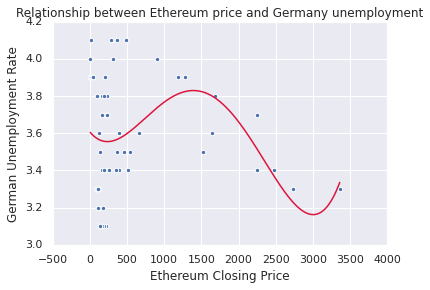

In [17]:
x = Ger_Ethereum_correlation.dropna()['ETH_closing_price']
y = Ger_Ethereum_correlation.dropna()['Germany_unemployment_rate']

poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Ethereum Closing Price')
plt.ylabel('German Unemployment Rate')
plt.title('Relationship between Ethereum price and Germany unemployment')

In [18]:
df_fitz = pd.DataFrame(xfit,yfit)
df_fitz.rename({'index':'yfit'}, inplace=True)
df_fitz_2 = df_fitz.reset_index()
df_fitz_2.rename(columns={'index':'yfit'}, inplace=True)
df_fitz_2.rename(columns={0:'xfit'}, inplace=True)
df_fitz_2

,yfit,xfit
0,3.604021,6.709893
1,3.602473,10.066547
2,3.600953,13.423200
3,3.599461,16.779854
4,3.597997,20.136507
...,...,...
995,3.321448,3346.580053
996,3.324893,3349.936706
997,3.328381,3353.293360
998,3.331913,3356.650013


In [19]:
Regression_output_table = pd.concat([Ger_Ethereum_correlation, df_fitz_2])
Regression_output_table.head(85)

,Unnamed: 0,LOCATION,TIME,Germany_unemployment_rate,index,time_close,ETH_closing_price,yfit,xfit
0,0.0,DEU,2016-09-01,4.1,0.0,2016-10-31 00:00:00+00:00,9.935500,NaN,NaN
1,1.0,DEU,2016-10-01,4.0,1.0,2016-11-30 00:00:00+00:00,7.975550,NaN,NaN
2,2.0,DEU,2016-11-01,3.9,2.0,2016-12-31 00:00:00+00:00,6.709893,NaN,NaN
3,3.0,DEU,2016-12-01,3.9,3.0,2017-01-31 00:00:00+00:00,8.442843,NaN,NaN
4,4.0,DEU,2017-01-01,3.9,4.0,2017-02-28 00:00:00+00:00,10.676927,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.580330,67.129655
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.579264,70.486308
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.578223,73.842962
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.577206,77.199615


In [20]:
Regression_output_table.to_csv('Regression_output_Ger_ETH.csv')